In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ENCODAGE

In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
y=np.array(['chat','chien','chat','oiseau'])

In [4]:
encoder=LabelEncoder()

In [5]:
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [6]:
encoder.inverse_transform([0,0,2,2])

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [7]:
X=np.array([['chat','poil'],['chien','poil'],['chat','poil'],['oiseau','plume']])

In [8]:
encoder=OrdinalEncoder()

In [9]:
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [10]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer,OneHotEncoder

In [11]:
y=np.array(['chat','chien','chat','oiseau'])

In [12]:
encoder=LabelBinarizer()

In [13]:
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [14]:
X=np.array([['chat','poil'],['chien','poil'],['chat','poil'],['oiseau','plume']])

In [15]:
encoder=OneHotEncoder()

In [16]:
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# NORMALISATION

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [18]:
X=np.array([[70],[80],[120]])

In [19]:
scaler=MinMaxScaler()

In [20]:
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

In [23]:
%matplotlib inline 
#%matplotlib qt

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris=load_iris()

In [26]:
X=iris.data

In [27]:
Xminmax=MinMaxScaler().fit_transform(X)
Xstandard=StandardScaler().fit_transform(X)
Xrobust=RobustScaler().fit_transform(X)

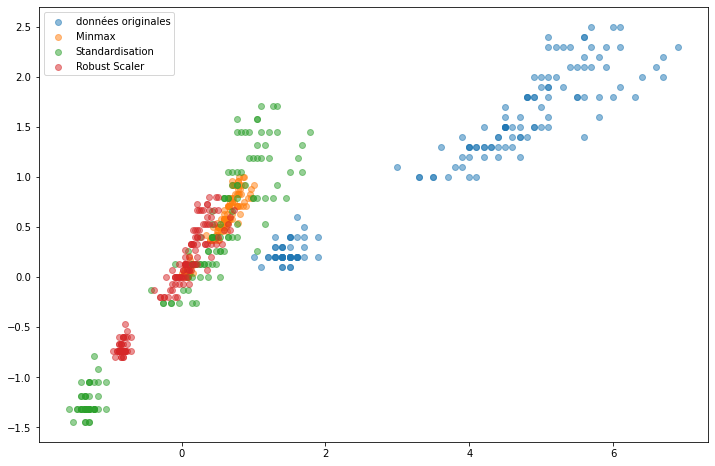

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,2],X[:,3],alpha=0.5,label='données originales')
plt.scatter(Xminmax[:,2],Xminmax[:,3],alpha=0.5,label='Minmax')
plt.scatter(Xstandard[:,2],Xstandard[:,3],alpha=0.5,label='Standardisation')
plt.scatter(Xrobust[:,2],Xrobust[:,3],alpha=0.5,label='Robust Scaler')
plt.legend()
plt.show()


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X=np.array([[1],
           [2],
           [3]])

In [31]:
PolynomialFeatures(3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [32]:
X=np.linspace(0,4,100).reshape((100,1))
y=X**2+5*np.cos(X)+np.random.randn(100,1)

In [33]:
Xpoly=PolynomialFeatures(3).fit_transform(X)

In [34]:
from sklearn.linear_model import LinearRegression

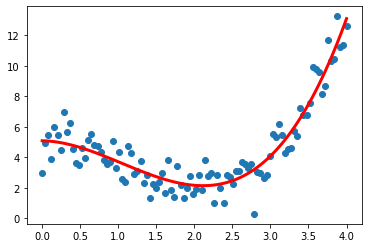

In [35]:
model=LinearRegression().fit(Xpoly,y)
ypred=model.predict(Xpoly)

plt.scatter(X,y)
plt.plot(X,ypred,c='r',lw=3)

# PIPELINE

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [37]:
model=make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(),verbose=False)

In [39]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [40]:
params={'polynomialfeatures__degree':[2,3,4],
       'sgdclassifier__penalty':['l1','l2']}

In [41]:
grid=GridSearchCV(model,param_grid=params,cv=4)

In [42]:
X=iris.data
y=iris.target

In [43]:
grid.fit(X,y)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [44]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l2'}

In [45]:
grid.best_score_

0.9735064011379801

In [50]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [59]:
params={'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
       'svc__C':[0.01,0.1,1,10],
       'svc__degree':[1,2,3,4]}

In [60]:
grid=GridSearchCV(pipe,params,cv=4)

In [61]:
grid.fit(X,y)

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 179, in fit
    raise ValueError("Precomputed matrix must be a square matrix."
ValueError: Precomputed matrix must be a square matrix. Input is a 112x4 matrix.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: F

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 179, in fit
    raise ValueError("Precomputed matrix must be a square matrix."
ValueError: Precomputed matrix must be a square matrix. Input is a 112x4 matrix.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: F

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 179, in fit
    raise ValueError("Precomputed matrix must be a square matrix."
ValueError: Precomputed matrix must be a square matrix. Input is a 112x4 matrix.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: F

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 179, in fit
    raise ValueError("Precomputed matrix must be a square matrix."
ValueError: Precomputed matrix must be a square matrix. Input is a 112x4 matrix.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: F

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__degree': [1, 2, 3, 4],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']})

In [62]:
grid.best_params_

{'svc__C': 1, 'svc__degree': 1, 'svc__kernel': 'linear'}

In [63]:
grid.best_score_

0.9667496443812233